In [1]:
import pandas as pd
# Load the datasets
math_data_url = 'student-mat.csv'
portuguese_data_url = 'student-por.csv'
math_data = pd.read_csv(math_data_url, sep=';')
portuguese_data = pd.read_csv(portuguese_data_url, sep=';')
print("Math Dataset:")
print(math_data.head())
print("\nPortuguese Dataset:")
print(portuguese_data.head())

Math Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Portuguese Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

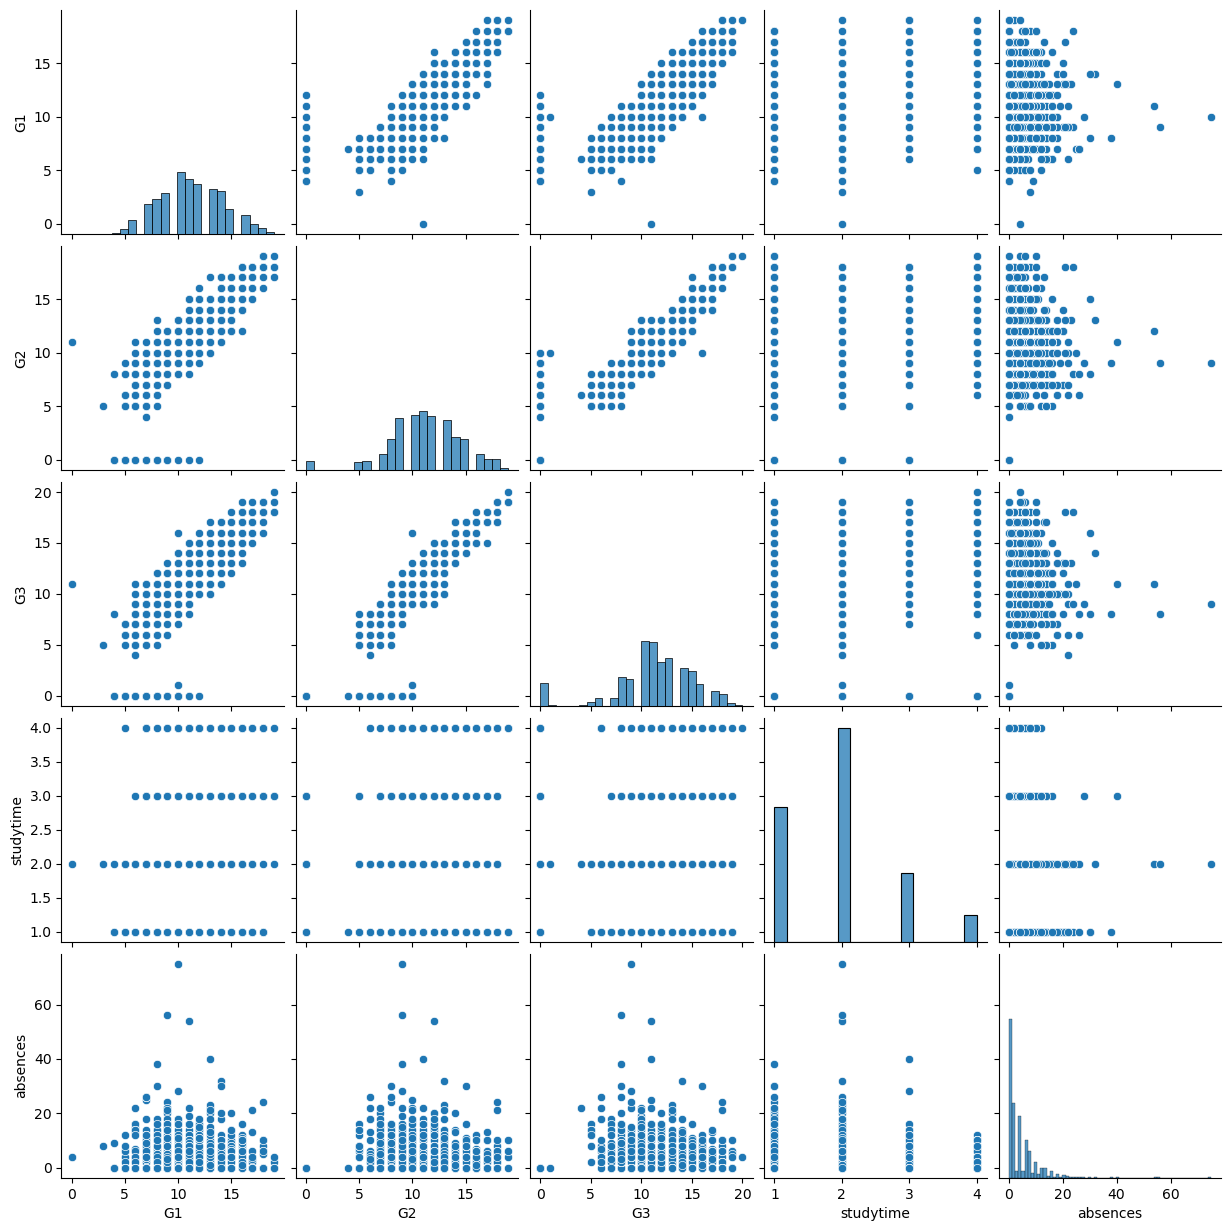

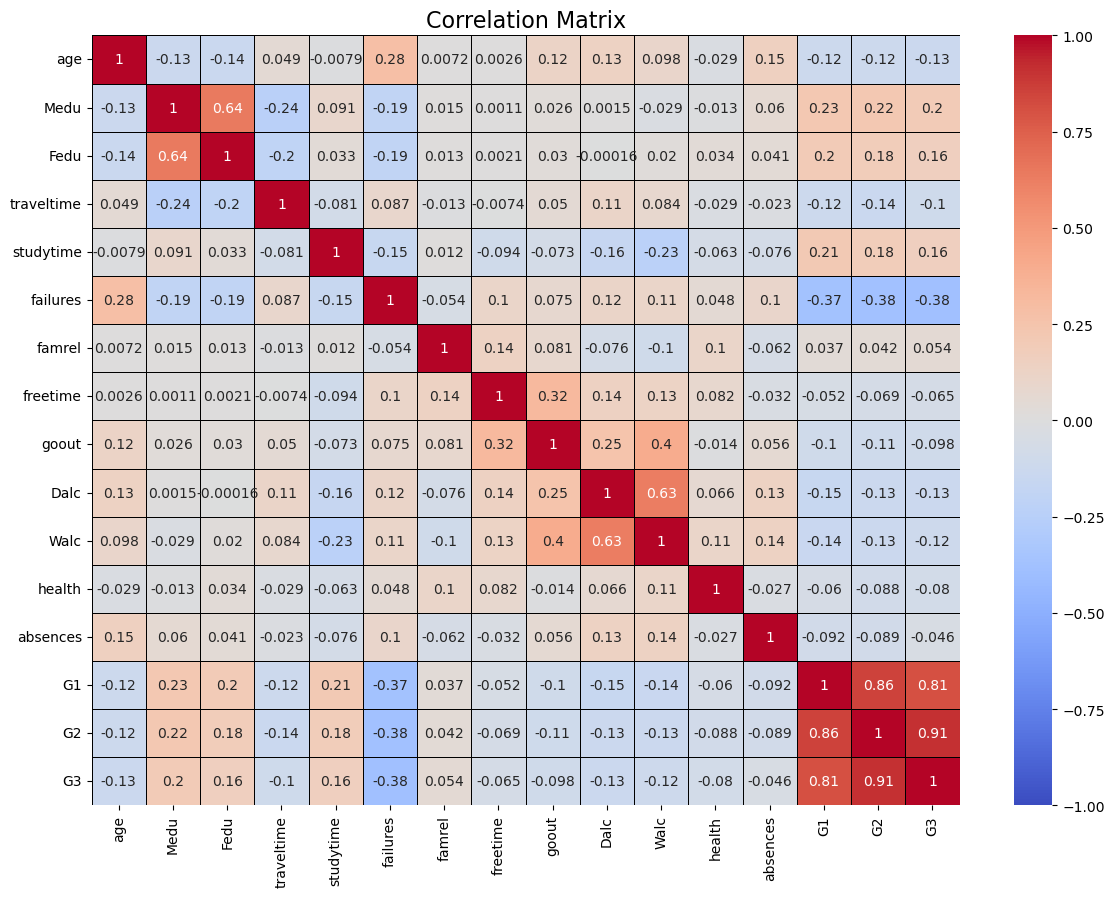

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# Combine both datasets for a unified analysis
data = pd.concat([math_data, portuguese_data], ignore_index=True)
print(data.describe())
print(data.isnull().sum())
# Visualize the relationship between features and the target variable (G3 - final grade)
plt.figure(figsize=(12, 8))
sns.pairplot(data[['G1', 'G2', 'G3', 'studytime', 'absences']])
plt.show()
# Select only numeric columns for the correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()
# Plot the correlation matrix with better size and colormap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [3]:
data['study_absences'] = data['studytime'] * data['absences']
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 study_absences  
0        3     4     1     1       3        6   5   6   6             12  
1        3     3     1     1       3        4   5   5   6              8  
2        3     2     2     3       3       10   7   8  10             20  
3        2     2     1     1       5        2  15  14  15              6  
4        3     2     1     2       5        4   6  10  10              8  

[5 rows x 34 columns]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define features and target variable
features = ['G1', 'G2', 'studytime', 'absences', 'study_absences']
X = data[features]
y = data['G3']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9835699530452544
R-squared: 0.8070237995466463


In [5]:
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

                Coefficient
G1                 0.157451
G2                 0.956513
studytime         -0.112592
absences           0.009728
study_absences     0.007224
